<a class="anchor" id="0"></a>
# **W03 - Class Practice - Global Coffee Health**

Evelin Alim Natadjaja - 0706022310021

In [175]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [177]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

Dari info yang diberikan dapat diketahui bahwa target variable Health_Issues memiliki null value yang cukup banyak sehingga kolom ini perlu di cleaning

In [178]:
# Dataset Describe
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


Berdasarkan descriptive statistic, seluruh data masih dalam range yang masuk akal dan tidak berpotensi menimbulkan outlier

### Cleaning dataset

In [179]:
#Drop kolom ID karena tidak diperlukan
df.drop('ID', axis=1, inplace=True)

In [180]:
# Changing null in column Health_Issues to 'None'
df['Health_Issues'] = df['Health_Issues'].fillna('None')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Coffee_Intake            10000 non-null  float64
 4   Caffeine_mg              10000 non-null  float64
 5   Sleep_Hours              10000 non-null  float64
 6   Sleep_Quality            10000 non-null  object 
 7   BMI                      10000 non-null  float64
 8   Heart_Rate               10000 non-null  int64  
 9   Stress_Level             10000 non-null  object 
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            10000 non-null  object 
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

Mengisi value yang dianggap null menjadi 'None' pada target variable

In [181]:
# Display unique values for each column
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 20)

Unique values for column 'Age':
[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
--------------------
Unique values for column 'Gender':
['Male' 'Female' 'Other']
--------------------
Unique values for column 'Country':
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
--------------------
Unique values for column 'Coffee_Intake':
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
--------------------
Unique values for column 'Caffeine_mg':
[328.1  94.1 5

In [182]:
# Check the frequency counts of categorical variables
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation', 'Health_Issues']

for col in col_names:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64
Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


The `Health_Issues` target variable is ordinal in nature.

### Visualization

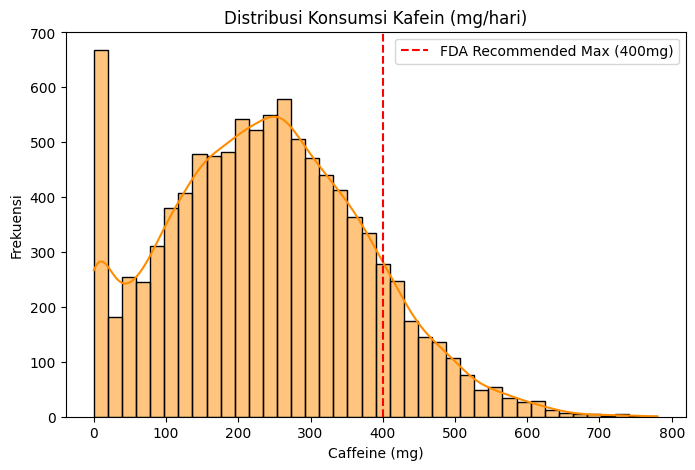

In [183]:
plt.figure(figsize=(8,5))
sns.histplot(df['Caffeine_mg'], bins=40, kde=True, color="darkorange")
plt.axvline(400, color='red', linestyle='--', label='FDA Recommended Max (400mg)')
plt.title("Distribusi Konsumsi Kafein (mg/hari)")
plt.xlabel("Caffeine (mg)")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

Dari grafik tersebut dapat diketahui bahwa sebagian besar mengonsumsi kafein dibawah batas wajar, dan banyak yang tidak mengonsumsi kafein.

/tmp/ipython-input-1562473507.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stress_Level", y="Sleep_Hours", data=df, palette="Set2")


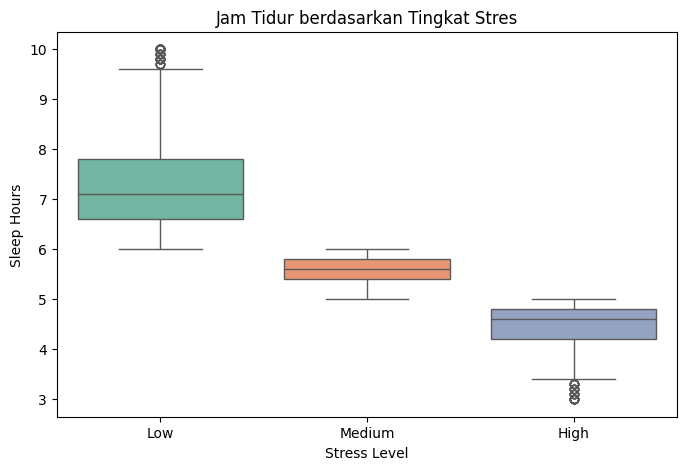

In [184]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Stress_Level", y="Sleep_Hours", data=df, palette="Set2")
plt.title("Jam Tidur berdasarkan Tingkat Stres")
plt.xlabel("Stress Level")
plt.ylabel("Sleep Hours")
plt.show()

Dari visualisasi ini, dapat diketahui bahwa orang dengan stress level yang tinggi cenderung memiliki jam tidur yang lebih sedikit yaitu hanya 4-5 jam daripada orang dengan stress level yang rendah

/tmp/ipython-input-3848138797.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Country", y="Coffee_Intake", data=df, estimator="mean", ci=None)


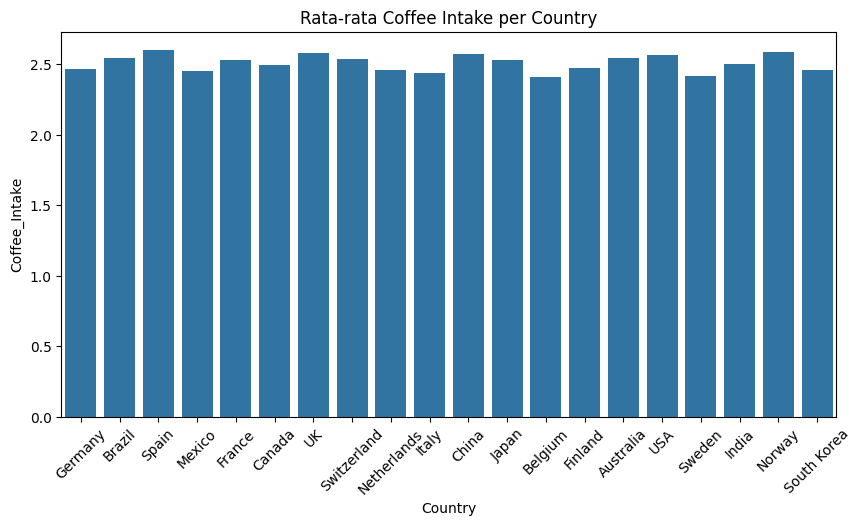

In [185]:
plt.figure(figsize=(10,5))
sns.barplot(x="Country", y="Coffee_Intake", data=df, estimator="mean", ci=None)
plt.title("Rata-rata Coffee Intake per Country")
plt.xticks(rotation=45)
plt.show()

Dari visualisasi tersebut, dapat diketahui coffee intake dari semua negara lebih dari 2. Beberapa negara yang tertinggi yaitu Mexico, UK, dan China

### Encode categorical variables

In [186]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation', 'Health_Issues']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['Other' 'Service' 'Office' 'Student' 'Healthcare']
['None' 'Mild' 'Moderate' 'Severe']


In [187]:
# Encoding for nominal column
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
print("Gender mapping:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
print("Country mapping:", dict(zip(le_country.classes_, le_country.transform(le_country.classes_))))

le_occupation = LabelEncoder()
df['Occupation'] = le_occupation.fit_transform(df['Occupation'])
print("Occupation mapping:", dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_))))

Gender mapping: {'Female': np.int64(0), 'Male': np.int64(1), 'Other': np.int64(2)}
Country mapping: {'Australia': np.int64(0), 'Belgium': np.int64(1), 'Brazil': np.int64(2), 'Canada': np.int64(3), 'China': np.int64(4), 'Finland': np.int64(5), 'France': np.int64(6), 'Germany': np.int64(7), 'India': np.int64(8), 'Italy': np.int64(9), 'Japan': np.int64(10), 'Mexico': np.int64(11), 'Netherlands': np.int64(12), 'Norway': np.int64(13), 'South Korea': np.int64(14), 'Spain': np.int64(15), 'Sweden': np.int64(16), 'Switzerland': np.int64(17), 'UK': np.int64(18), 'USA': np.int64(19)}
Occupation mapping: {'Healthcare': np.int64(0), 'Office': np.int64(1), 'Other': np.int64(2), 'Service': np.int64(3), 'Student': np.int64(4)}


In [188]:
encoders = {
    "gender": le_gender,
    "country": le_country,
    "occupation": le_occupation
}

In [189]:
# Encoding for ordinal column
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
health_issues_map = {'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}

df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2996,38,0,12,4.4,419.1,6.1,3,26.8,50,1,8.6,1,4,0,1
6801,24,1,1,1.2,111.9,7.2,3,31.0,77,1,8.0,2,3,0,0
5967,49,0,4,2.1,197.2,7.4,3,32.9,57,1,3.1,2,1,0,1
3830,32,1,6,2.1,203.6,8.9,4,25.1,74,1,11.6,1,0,0,1
830,18,1,19,3.6,343.7,6.8,3,20.4,72,1,3.6,1,0,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [190]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [191]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,7,3.5,328.1,7.5,3,24.9,78,1,14.5,2,0,0
1,33,1,7,1.0,94.1,6.2,3,20.0,67,1,11.0,3,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,1,0,0
3,53,1,7,2.6,249.2,7.3,3,24.7,71,1,6.6,2,0,0
4,32,0,15,3.1,298.0,5.3,2,24.1,76,2,8.5,4,0,1


In [192]:
y.head()

,Health_Issues
0,1
1,1
2,2
3,2
4,2


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [193]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [194]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [195]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,15,4.3,405.6,5.4,2,18.0,86,2,2.4,3,0,1
1561,26,1,8,0.0,0.0,5.5,2,28.3,75,2,10.8,2,0,0
1670,32,1,14,2.8,268.1,7.3,3,27.4,69,1,8.6,1,0,0
6087,18,1,14,2.2,208.6,8.1,4,16.3,83,1,8.9,2,0,1
6669,43,0,18,2.6,251.1,9.4,4,25.4,68,1,3.4,1,0,0


In [196]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,13,2.6,245.9,6.7,3,30.1,76,1,1.9,3,0,1
4684,22,0,11,3.1,293.1,7.6,3,20.4,69,1,5.0,3,0,0
1731,30,1,0,3.9,372.4,6.4,3,27.5,75,1,13.8,1,0,0
4742,35,1,7,1.0,92.5,5.3,2,23.1,71,2,2.4,3,0,0
4521,47,1,9,1.3,119.0,6.9,3,28.4,64,1,9.6,1,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [197]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [198]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [199]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [200]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

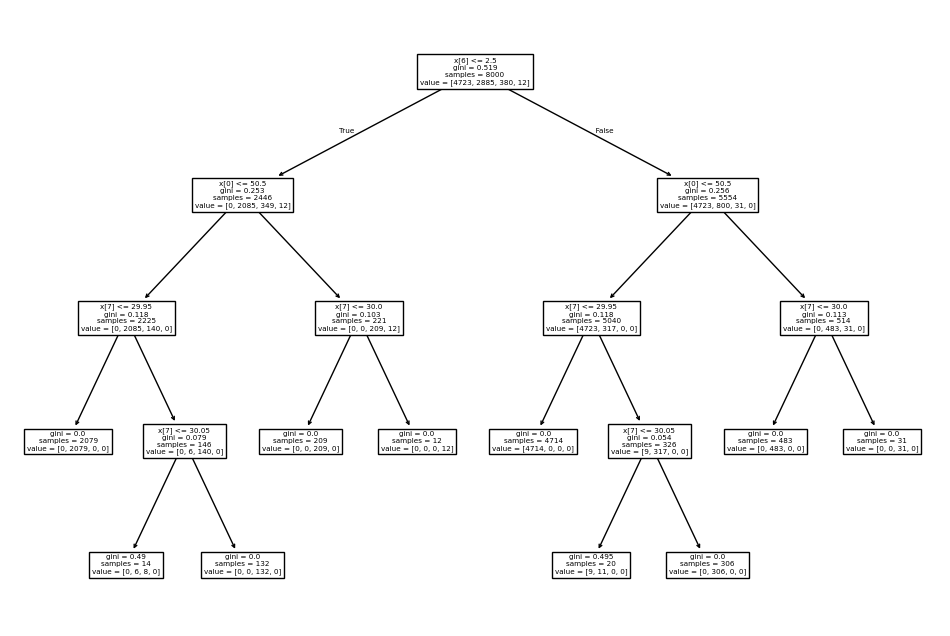

In [201]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [202]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [203]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [204]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

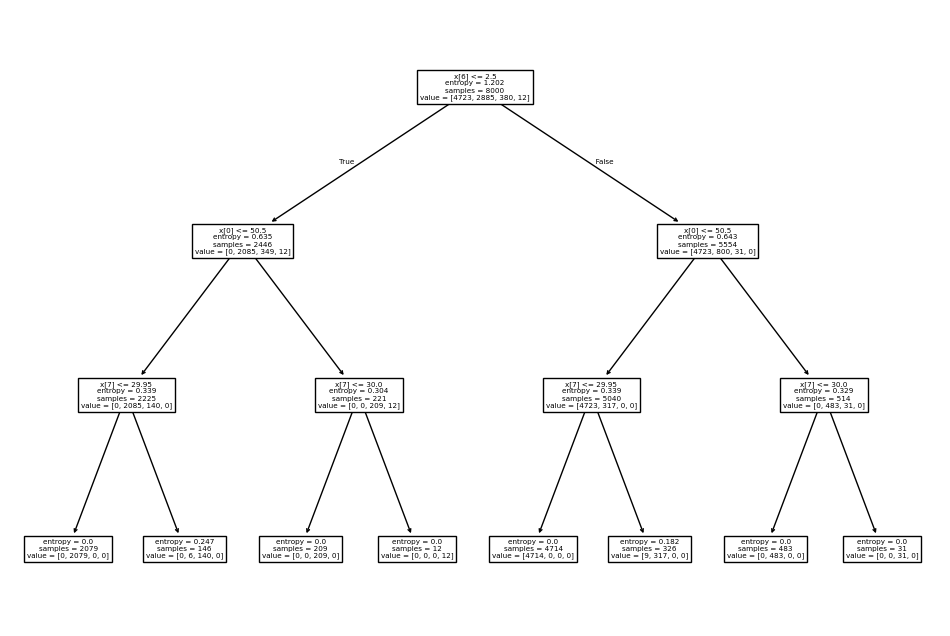

In [205]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [206]:
X_train

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,15,4.3,405.6,5.4,2,18.0,86,2,2.4,3,0,1
1561,26,1,8,0.0,0.0,5.5,2,28.3,75,2,10.8,2,0,0
1670,32,1,14,2.8,268.1,7.3,3,27.4,69,1,8.6,1,0,0
6087,18,1,14,2.2,208.6,8.1,4,16.3,83,1,8.9,2,0,1
6669,43,0,18,2.6,251.1,9.4,4,25.4,68,1,3.4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,28,2,2,1.4,130.7,4.6,1,25.1,64,3,11.3,2,0,0
5191,34,0,4,0.0,0.0,6.2,3,22.3,73,1,7.9,1,0,0
5390,26,1,11,4.4,418.3,5.2,2,18.5,71,2,10.1,2,0,0
860,37,0,19,0.3,29.8,9.1,4,18.8,74,1,0.6,1,0,0


In [207]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [208]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [209]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [210]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [211]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [212]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      1218
           2       0.88      0.70      0.78       694
           3       0.73      0.13      0.22        83
           4       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.62      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [218]:
# Make a prediction with the gini index model
def preprocess_input(df):
    df['Gender'] = encoders["gender"].transform(input_df['Gender'])
    df['Country'] = encoders["country"].transform(input_df['Country'])
    df['Occupation'] = encoders["occupation"].transform(input_df['Occupation'])
    df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
    df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
    return df

new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 'Poor',
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 'High',
    'Physical_Activity_Hours': 2,
    'Occupation': 'Student',
    'Smoking': '1', #Yes
    'Alcohol_Consumption': '1' #Yes
}

# Convert the new data to a pandas DataFrame
input_df = pd.DataFrame([new_data])
input_df = preprocess_input(input_df)

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction Gini:", prediction_gini[0])

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

# Make the prediction using the entropy model
prediction_en = clf_en.predict(input_df)
print("Prediction Entropy:", prediction_en[0])
inverse_prediction_entropy = {v:k for k,v in health_issues_map.items()}
print(f"The predicted class for the given input using the entropy index model is: {inverse_prediction_entropy[prediction_en[0]]}")

# Make the prediction using the naive bayes
prediction_nb = nb_classifier.predict(input_df)
print("Prediction Naive Bayes:", prediction_nb[0])
inverse_prediction_nb = {v:k for k,v in health_issues_map.items()}
print(f"The predicted class for the given input using the naive bayes model is: {inverse_prediction_nb[prediction_nb[0]]}")

Prediction Gini: 2
The predicted class for the given input using the gini index model is: Mild
Prediction Entropy: 2
The predicted class for the given input using the entropy index model is: Mild
Prediction Naive Bayes: 2
The predicted class for the given input using the naive bayes model is: Mild
